### **Config**

In [1]:
import os
import sys

sys.path.insert(0, '/home/marco/epfl/magma/')
import config

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [2]:
BART_DIR = config.MAGMA_DIR+'fine-tuning/ft_bart_bull_para_embed_gas16_lr5e-05/'
T5_DIR = config.MAGMA_DIR+'fine-tuning/ft_t5_bull_para_embed_gas16_lr5e-05/'
PEGASUS_DIR = config.MAGMA_DIR+'fine-tuning/ft_pegasus_bull_para_embed_gas64_lr5e-05/'


PEGASUS_BYBOOK_DIR = config.MAGMA_DIR+\
    'fine-tuning/ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05/'
PEGASUS_MERGED_OVERLAPS_DIR = config.MAGMA_DIR+\
    'fine-tuning/ft_pegasus_bull_para_embed_merged_overlaps_gas64_lr5e-05/'
PEGASUS_MERGED_OVERLAPS_BYBOOK_DIR = config.MAGMA_DIR+\
    'fine-tuning/ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05/'

FILE_PREFIX = '_content_drive_My Drive_MAGMA_ Summarization_fine-tuning_'

### **Init**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import re
import pandas as pd
from tqdm import tqdm
from textwrap import fill
tqdm.pandas()

### **Function Definition**

##### Plot Models Comparison

In [4]:
def plot_compare_models(split, model_names, model_files, metrics_names, metrics, colors, title):
    import json
    
    results = np.zeros((len(metrics), len(model_files)))
    
    for i, f in enumerate(model_files):
        f += ('_'+split+'.json')
        with open(f) as f_json:
            d = json.load(f_json)
            results[:, i] = [round(d[m], 2) for m in metrics]
    
    dim = 0.07*len(model_names)
    x = np.arange(len(metrics))
    var = np.linspace(-dim, dim, len(model_names))
    width = dim*2 / (len(model_names)-1)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    models_plots = []
    for i, (model, v, c) in enumerate(zip(model_names, var, colors)):
        models_plots.append(ax.bar(x +v, results[:, i], width, label=model, color=c))
    
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_names)
    ax.set_title(title)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    for p in models_plots:
        autolabel(p)
    
    fig.tight_layout()

    plt.show()

In [5]:
def print_compare_models(split, models_names, models_files, dataset_dir):
    source_file = dataset_dir+split+'.source'
    target_file = dataset_dir+split+'.target'
    
    with open(source_file, 'r') as src,\
        open(target_file, 'r') as tgt:
            src_lines = src.readlines()
            tgt_lines = tgt.readlines()
    
    results = []
    for f in models_files:
        f += ('_'+split+'.txt')
        with open(f, 'r') as fp:
            results.append(fp.readlines())

    for i, (s, t) in enumerate(zip(src_lines, tgt_lines)):
        print(s)
        for name, res in zip(models_names, results):
            print(name+':')
            print(res[i])
        print('Reference:')
        print(t)
        print(''.join(['#']*100))
        print(''.join(['#']*100))
        print()

### Compare Models Out of the Box

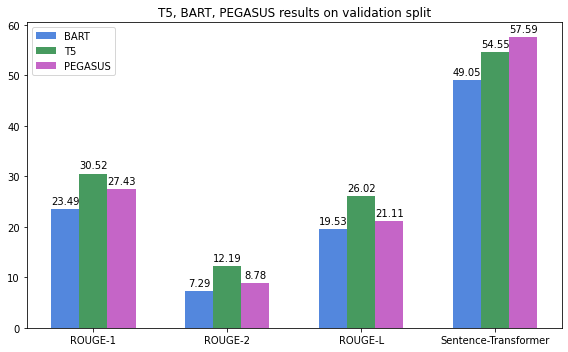

In [7]:
plot_compare_models(
    'val',
    
    ['BART',
    'T5',
    'PEGASUS'],
    
    [BART_DIR+'sshleifer_distilbart-cnn-12-6_bull_para_embed',
    T5_DIR+'t5-large_bull_para_embed',
    PEGASUS_DIR+'google_pegasus-large_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['#5387DD',
     '#479A5F',
     '#C565C7'],
    
    'T5, BART, PEGASUS results on validation split'
)

### Fine-Tuning Improvements

##### BART

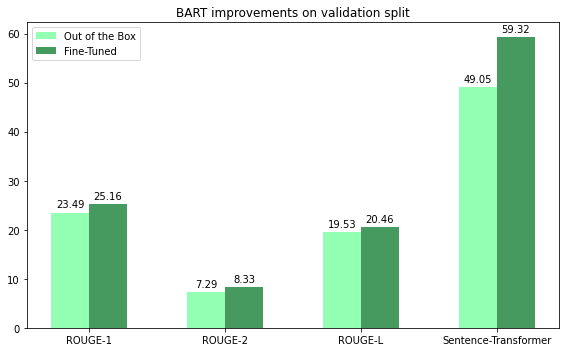

In [8]:
plot_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [BART_DIR+'sshleifer_distilbart-cnn-12-6_bull_para_embed',
    BART_DIR+FILE_PREFIX+'ft_bart_bull_para_embed_gas16_lr5e-05_checkpoint-196_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['#92FFB3',
    '#479A5F'],
    
    'BART improvements on validation split'
)

In [9]:
print_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [BART_DIR+'sshleifer_distilbart-cnn-12-6_bull_para_embed',
    BART_DIR+FILE_PREFIX+'ft_bart_bull_para_embed_gas16_lr5e-05_checkpoint-196_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 

##### T5

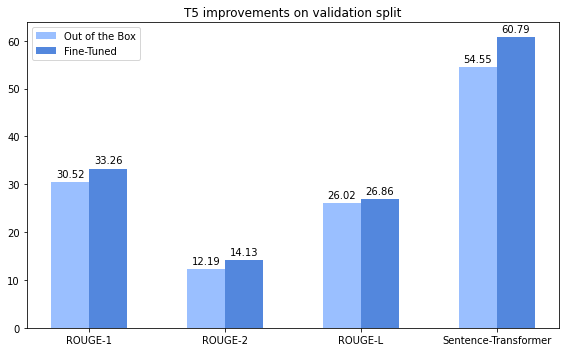

In [10]:
plot_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [T5_DIR+'t5-large_bull_para_embed',
    T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['#9ABFFF',
     '#5387DD'],
    
    'T5 improvements on validation split'
)

In [11]:
print_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [T5_DIR+'t5-large_bull_para_embed',
    T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 


Reference:
Prophylactic antibiotics and early endoscopic retrograde cholangiopancreatography are not associated with improved outcomes.

####################################################################################################
####################################################################################################

Status epilepticus and seizure clusters. Status epilepticus (SE) is a life-threatening medical emergency characterized by frequent and/or prolonged epileptic seizures. Community-based studies in the USA suggest the incidence may be as high as 50 per 100000 people per year, peaking in children under 1 year of age and in adults over 60 years of age. With the aging of the population, it is likely that SE will become an increasingly important public health problem.

Out of the Box:
SE is a life-threatening medical emergency characterized by frequent and/or prolonged epileptic seizures . community-based studies in the us suggest the incidence may be as hig

##### PEGASUS

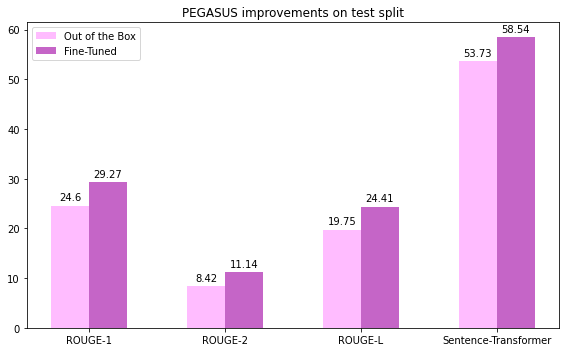

In [12]:
plot_compare_models(
    'test',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [PEGASUS_DIR+'google_pegasus-large_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['#FFBCFF',
    '#C565C7'],
    
    'PEGASUS improvements on test split'
)

In [13]:
print_compare_models(
    'val',
    
    ['Out of the Box',
    'Fine-Tuned'],
    
    [PEGASUS_DIR+'google_pegasus-large_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 

### Compare Fine-Tuned Models

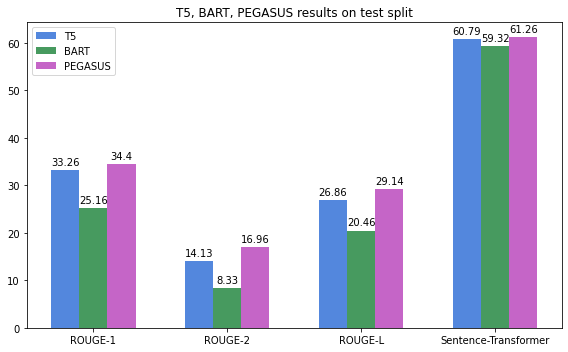

In [14]:
plot_compare_models(
    'val',
    
    ['T5',
    'BART',
    'PEGASUS'],
    
    [T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed',
    BART_DIR+FILE_PREFIX+'ft_bart_bull_para_embed_gas16_lr5e-05_checkpoint-196_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['#5387DD',
     '#479A5F',
     '#C565C7'],
    
    'T5, BART, PEGASUS results on test split'
)

In [15]:
print_compare_models(
    'val',
    
    ['T5',
    'BART',
    'PEGASUS'],
    
    [T5_DIR+FILE_PREFIX+'ft_t5_bull_para_embed_gas16_lr5e-05_checkpoint-441_bull_para_embed',
    BART_DIR+FILE_PREFIX+'ft_bart_bull_para_embed_gas16_lr5e-05_checkpoint-196_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed'],
    
    config.MAGMA_DIR+'datasets/bullet_paragraph_embeddings/bart/st/base/'
)

The immune system has evolved to protect the host against infectious agents such as bacteria, viruses and fungi, and to detect and eliminate potentially harmful foreign material. A hallmark of cancer is that tumor cells - which would normally be recognized by the immune system as abnormal - acquire the ability to evade the immune system. Immuno-oncology is a new, multi-faceted and rapidly evolving collection of treatment strategies aimed at harnessing immune processes to target and destroy tumor cells and prolong survival. An understanding of the basic elements of the normal and tumor-altered immune system is therefore key to understanding potential immuno-oncology therapies. The immune system consists of two components: innate immunity and adaptive immunity. Innate immunity is conferred by mechanisms that are present throughout life, such as the physical barriers to infection provided by the skin and mucous membranes, white blood cells that remove foreign material, and serum proteins 

### PEGASUS GPS improvements

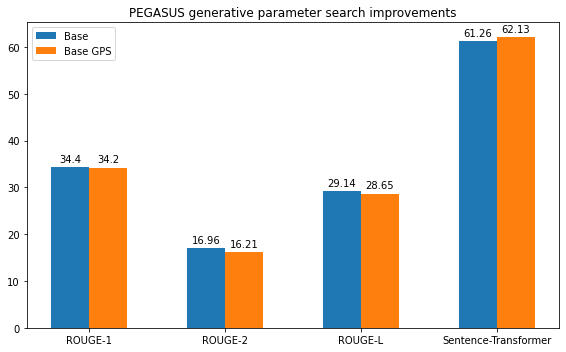

In [17]:
plot_compare_models(
    'val',
    
    ['Base',
    'Base GPS'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed',
    PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed_gps'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['C0',
    'C1'],
    
    'PEGASUS generative parameter search improvements'
)

### PEGASUS Compare Base, Base by Book

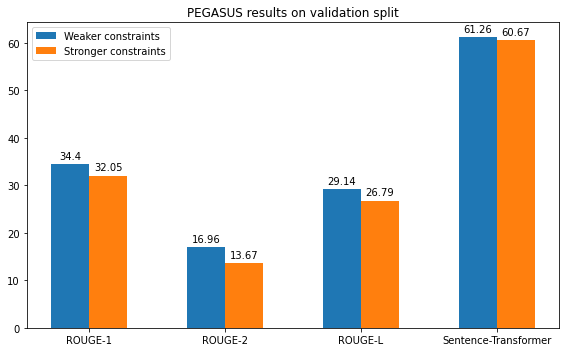

In [18]:
plot_compare_models(
    'val',
    
    ['Weaker constraints',
    'Stronger constraints'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed',
    PEGASUS_BYBOOK_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05_checkpoint-686_bull_para_embed_bybook'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['C0',
    'C1'],
    
    'PEGASUS results on validation split'
)

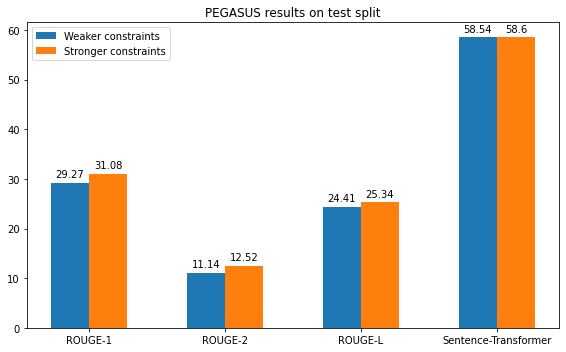

In [19]:
plot_compare_models(
    'test',
    
    ['Weaker constraints',
    'Stronger constraints'],
    
    [PEGASUS_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_gas64_lr5e-05_checkpoint-686_bull_para_embed',
    PEGASUS_BYBOOK_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05_checkpoint-686_bull_para_embed_bybook'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    ['C0',
    'C1'],
    
    'PEGASUS results on test split'
)

### PEGASUS Compare Base by Book, Merged Overlaps by Book

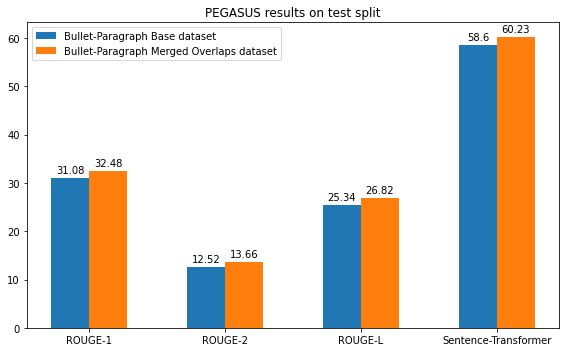

In [21]:
plot_compare_models(
    'test',
    
    ['Bullet-Paragraph Base dataset',
    'Bullet-Paragraph Merged Overlaps dataset'],
    
    [PEGASUS_BYBOOK_DIR+FILE_PREFIX+'ft_pegasus_bull_para_embed_bybook_gas64_lr5e-05_checkpoint-686_bull_para_embed_bybook',
    PEGASUS_MERGED_OVERLAPS_BYBOOK_DIR+FILE_PREFIX+\
        'ft_pegasus_bull_para_embed_merged_overlaps_bybook_gas64_lr5e-05_checkpoint-539_bull_para_embed_merged_overlaps_bybook'],
    
    ['ROUGE-1',
    'ROUGE-2',
    'ROUGE-L',
    'Sentence-Transformer'],
    
    ['rouge1_fmeasure',
    'rouge2_fmeasure',
    'rougeLsum_fmeasure',
    'sentence_distilroberta_cosine'],
    
    
    ['C0',
    'C1'],
    
    'PEGASUS results on test split'
)